In [35]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

import sys; sys.path.append('..')
from planet.utils.data_utils import random_transforms, tagstr_to_binary, TAGS


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
img_dir = '../data/train-jpg'
img_ext = 'jpg'

In [38]:
df = pd.read_csv('../data/train_v2.csv')
img_names = df['image_name'].values
img_tags = np.asarray([tagstr_to_binary(t) for t in df['tags'].values])
print(img_tags)
print(img_tags.shape)

[[0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 1]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]]
(40479, 17)


In [29]:
# Mapping from tag to image indexes.
tags_to_img_idxs = [[] for _ in TAGS]
for img_idx, tags in enumerate(img_tags):
    pos_tags, = np.where(tags == 1.)
    for t in pos_tags:
        tags_to_img_idxs[t].append(img_idx)
print(tags_to_img_idxs[0][:10])

[1, 4, 6, 8, 9, 10, 19, 20, 23, 27]


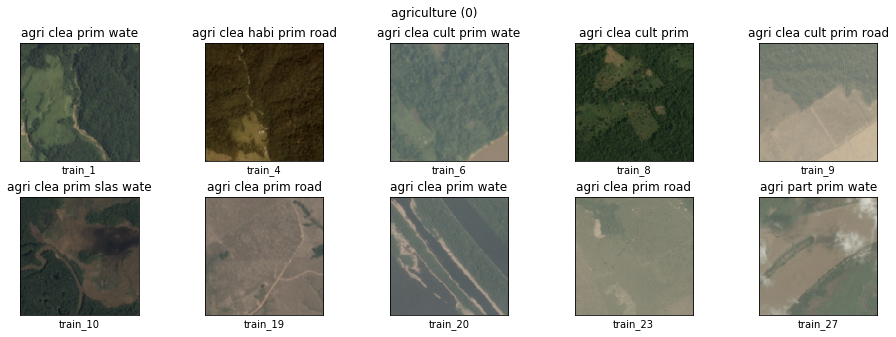

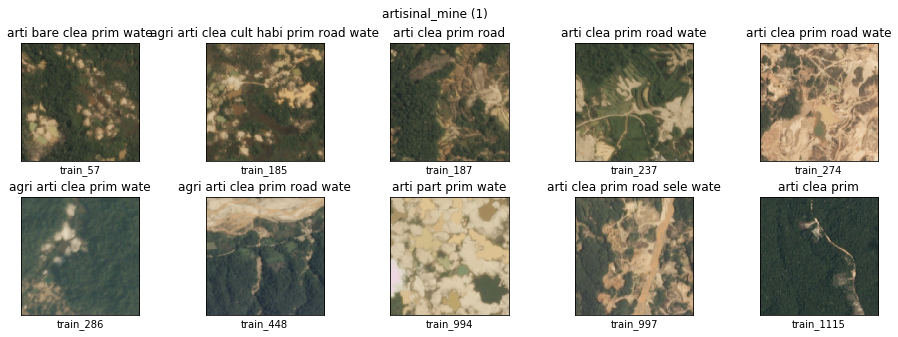

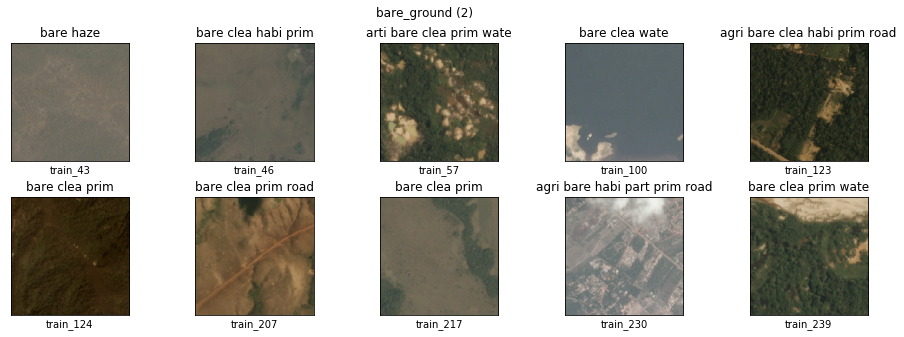

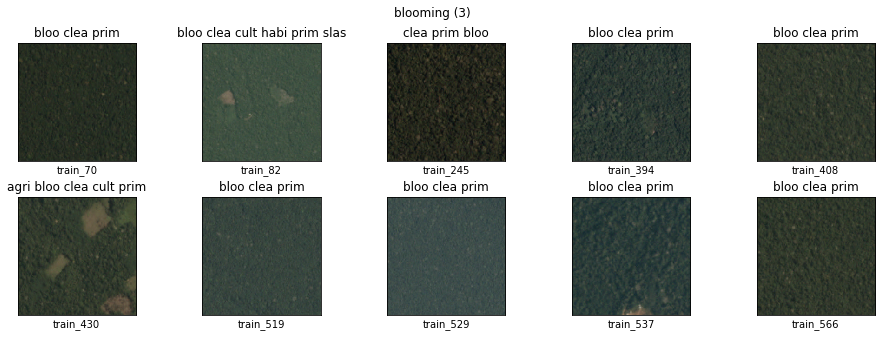

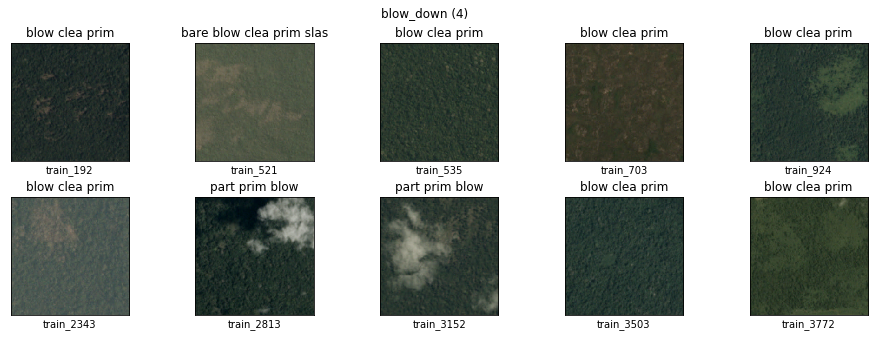

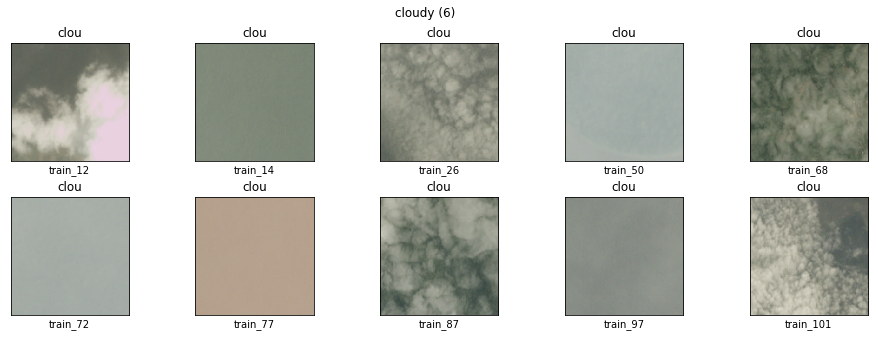

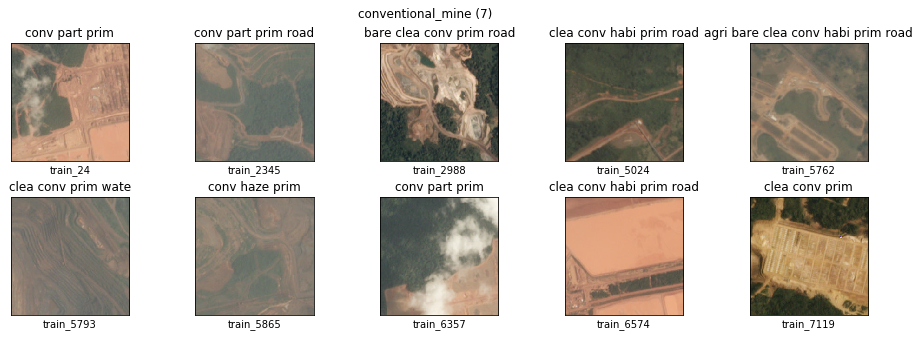

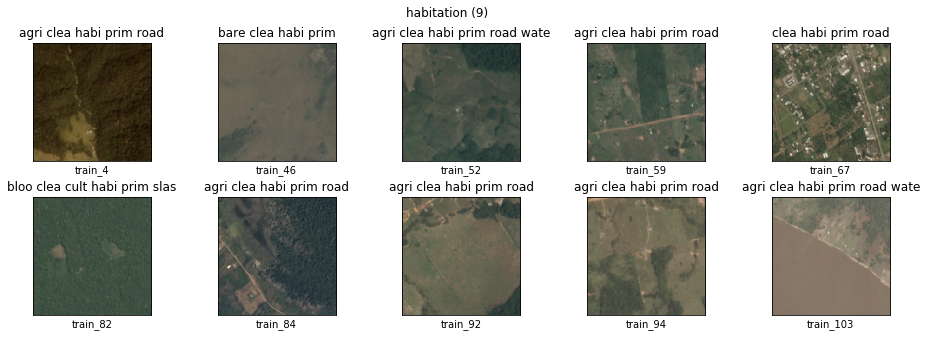

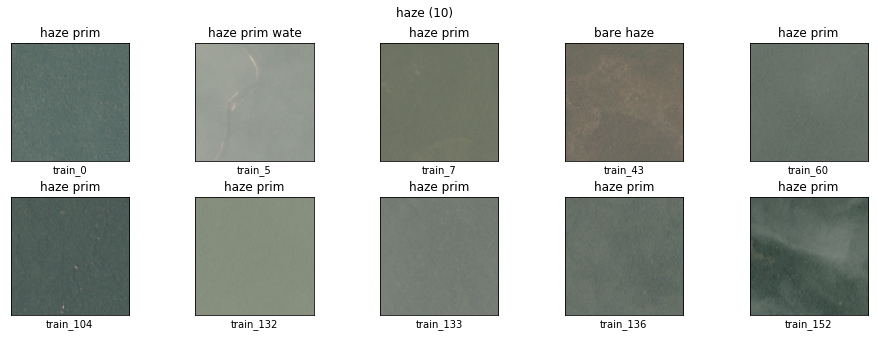

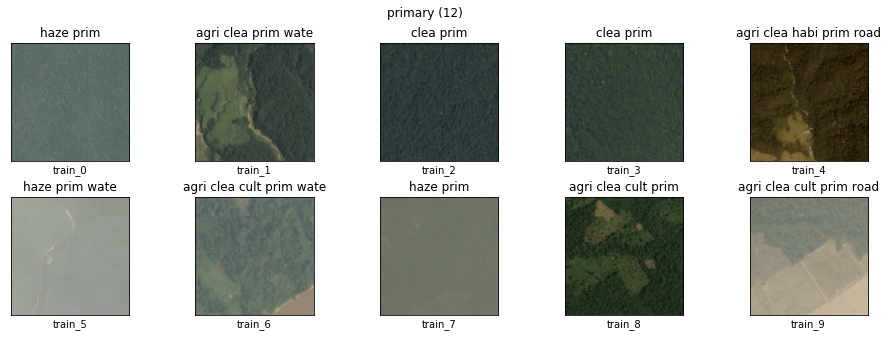

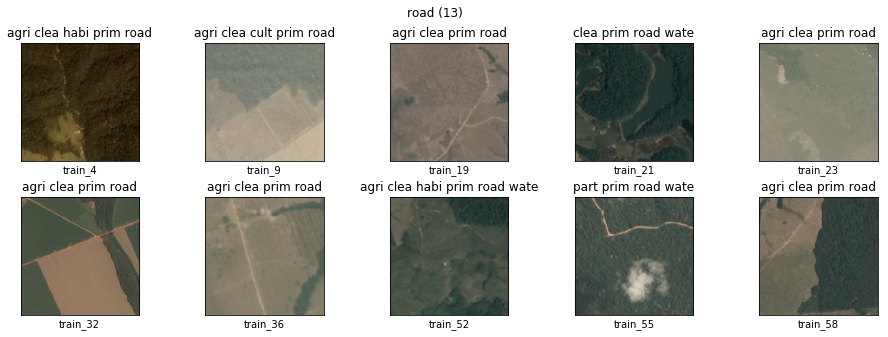

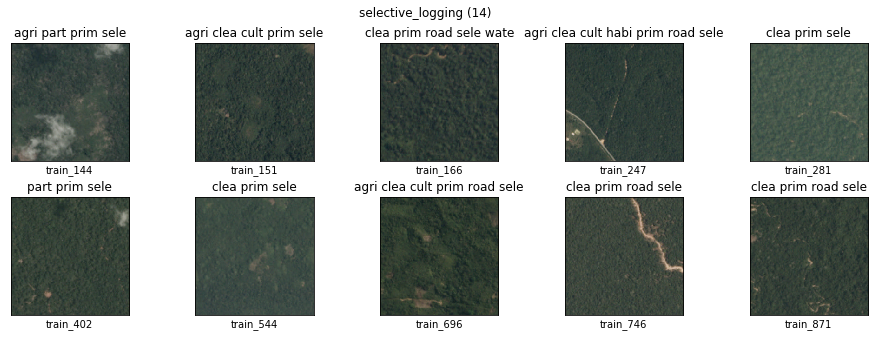

In [117]:
# Show images of each tag
num_imgs_per_tag = 10
num_columns = 5

num_rows = int(num_imgs_per_tag/num_columns)

for tag_idx in range(len(TAGS)):
    fig, _ = plt.subplots(num_rows, num_columns, figsize=(16, num_rows * 2.5))
    fig.suptitle('%s (%d)' % (TAGS[tag_idx], tag_idx))
    for i, img_idx in enumerate(tags_to_img_idxs[tag_idx][:num_imgs_per_tag]):
        img_name = img_names[img_idx]
        img_path = '%s/%s.%s' % (img_dir, img_name, img_ext)
        img = Image.open(img_path).convert('RGB')
        
        # img.thumbnail((64, 64))
        # img = np.asarray(img) / 255.
        
        ax1 = fig.axes[i]
        ax1.imshow(img)
        
        ax1.set_title(' '.join([t[:4] for t in df['tags'][img_idx].split(' ')]), rotation=0)
        ax1.set_xlabel(img_name)
        ax1.get_xaxis().set_ticks([])
        ax1.get_yaxis().set_ticks([])
    fig.subplots_adjust(hspace=0.3)
    plt.show()
    plt.close()